# Problem: What factors affects a movie success? 


## 1. We will be looking at the aspect of movie score

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 


In [2]:
#importing data
df = pd.read_csv('movies.csv')


In [3]:
#null data are removed 
null_budget = df['budget'].isnull()
df[null_budget].head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [4]:
#extracting null data
df=df.dropna()

### Data Exploration of Director
#### Correlation between Directors by their number of movies and Scores

In [7]:
#filtering data from year 2010 to 2020
df_yearrange = df[df['year'].between(2010, 2020)]
print("Data type : ", type(df_yearrange))
print("Data dims : ", df_yearrange.shape)
df_yearrange.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1521, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,836836967.0,Warner Bros.,148.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,623933331.0,Paramount Pictures,124.0
5645,Shutter Island,R,Mystery,2010,"February 19, 2010 (United States)",8.2,1200000.0,Martin Scorsese,Laeta Kalogridis,Leonardo DiCaprio,United States,80000000.0,294805697.0,Paramount Pictures,138.0
5646,Scott Pilgrim vs. the World,PG-13,Action,2010,"August 13, 2010 (United States)",7.5,394000.0,Edgar Wright,Michael Bacall,Michael Cera,United States,60000000.0,48917974.0,Universal Pictures,112.0
5647,Grown Ups,PG-13,Comedy,2010,"June 25, 2010 (United States)",5.9,233000.0,Dennis Dugan,Adam Sandler,Adam Sandler,United States,80000000.0,271457301.0,Columbia Pictures,102.0


In [8]:
#create a joint dataframe by concatenating the two variables
score = pd.DataFrame(df_yearrange['score'])
director = pd.DataFrame(df_yearrange['director'])
Directors_df = pd.concat([score,director],axis=1).reindex(director.index)
Directors_df

,score,director
5643,8.8,Christopher Nolan
5644,7.0,Jon Favreau
5645,8.2,Martin Scorsese
5646,7.5,Edgar Wright
5647,5.9,Dennis Dugan
...,...,...
7648,6.6,Adil El Arbi
7649,6.5,Jeff Fowler
7650,5.6,Stephen Gaghan
7651,6.8,Chris Sanders


In [9]:
#combining score, director and number of movies
Directors_df['number'] = Directors_df.groupby(['director'])['director'].transform('count')
Directors_df

,score,director,number
5643,8.8,Christopher Nolan,5
5644,7.0,Jon Favreau,5
5645,8.2,Martin Scorsese,5
5646,7.5,Edgar Wright,3
5647,5.9,Dennis Dugan,4
...,...,...,...
7648,6.6,Adil El Arbi,1
7649,6.5,Jeff Fowler,1
7650,5.6,Stephen Gaghan,2
7651,6.8,Chris Sanders,1


In [10]:
#sorting number of movies
Directors_df.sort_values(by='number', ascending=False)

,score,director,number
6328,5.3,Ridley Scott,7
7130,7.2,Steven Spielberg,7
7136,6.8,Ridley Scott,7
7144,6.2,Woody Allen,7
6693,7.6,Steven Spielberg,7
...,...,...,...
6553,6.6,Tommy Lee Jones,1
6560,6.3,Erik Van Looy,1
6563,6.1,William Eubank,1
6565,6.9,Gina Prince-Bythewood,1


In [11]:
#new dataframe for directors who directed 7 movies
seven = Directors_df[Directors_df['number'] == 7]
seven.head()

,score,director,number
5655,6.6,Ridley Scott,7
5783,6.4,Clint Eastwood,7
5823,6.3,Woody Allen,7
5849,7.7,Woody Allen,7
5912,7.2,Steven Spielberg,7


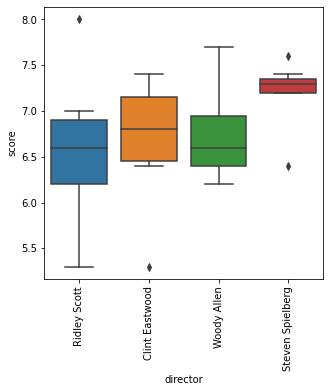

In [12]:
#boxplot to find the 50th percentile and outliers
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'director', y = 'score', data = seven)
plt.xticks(rotation=90);

In [13]:
#new dataframe for directors who directed 6 movies
six = Directors_df[Directors_df['number'] == 6]
six.head()

,score,director,number
5657,6.8,James Wan,6
5667,6.4,Tim Burton,6
5867,6.7,Steven Soderbergh,6
5898,5.5,David Gordon Green,6
5936,5.7,David Gordon Green,6


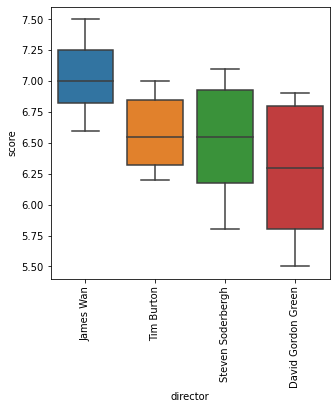

In [14]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'director', y = 'score', data = six)
plt.xticks(rotation=90);

In [15]:
#new dataframe for directors who directed 5 movies
five = Directors_df[Directors_df['number'] == 5]
five.head()

,score,director,number
5643,8.8,Christopher Nolan,5
5644,7.0,Jon Favreau,5
5645,8.2,Martin Scorsese,5
5661,4.0,M. Night Shyamalan,5
5664,8.3,Denis Villeneuve,5


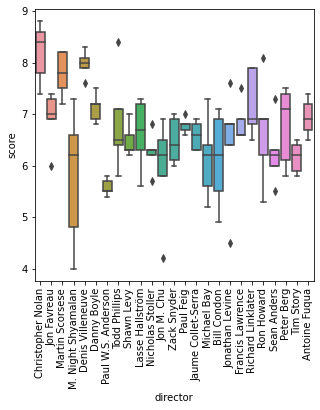

In [16]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'director', y = 'score', data = five)
plt.xticks(rotation=90);

In [17]:
#new dataframe for directors who directed 4 movies
four = Directors_df[Directors_df['number'] == 4]
four.head()

,score,director,number
5647,5.9,Dennis Dugan,4
5649,7.6,Matthew Vaughn,4
5659,7.0,Robert Schwentke,4
5677,6.3,James Mangold,4
5681,6.6,Adam McKay,4


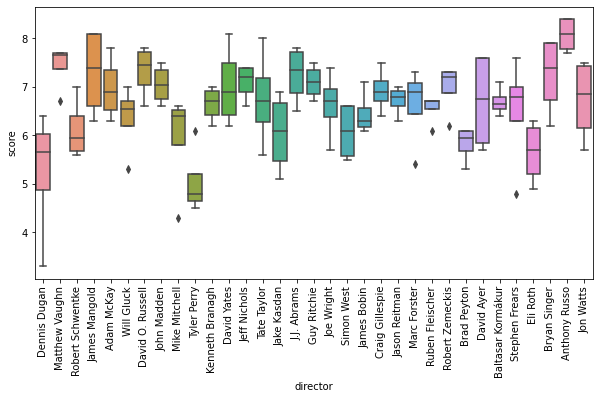

In [18]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(10, 5))
sb.boxplot(x = 'director', y = 'score', data = four)
plt.xticks(rotation=90);

In [19]:
#grouping directors by the number of movies
NumMovies_byDirectors = [seven, six, five, four]
result_Directors = pd.concat(NumMovies_byDirectors)

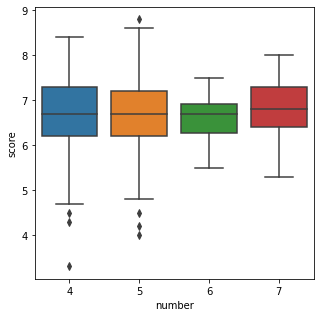

In [20]:
#boxplot to find the general score against number of movies
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'number', y = 'score', data = result_Directors)
plt.xticks(rotation=0);

### Finding: Generally the more movies produced by directors, the higher the score

In [21]:
#new dataframe for mean score of 7 movies
seven["mean7"] = seven["score"].mean()
seven.head()

<ipython-input-21-e529ca84b4b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven["mean7"] = seven["score"].mean()


,score,director,number,mean7
5655,6.6,Ridley Scott,7,6.8
5783,6.4,Clint Eastwood,7,6.8
5823,6.3,Woody Allen,7,6.8
5849,7.7,Woody Allen,7,6.8
5912,7.2,Steven Spielberg,7,6.8


In [22]:
#new dataframe for mean score of 6 movies
six["mean6"] = six["score"].mean()
six.head()

<ipython-input-22-45c5410ed4d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six["mean6"] = six["score"].mean()


,score,director,number,mean6
5657,6.8,James Wan,6,6.6
5667,6.4,Tim Burton,6,6.6
5867,6.7,Steven Soderbergh,6,6.6
5898,5.5,David Gordon Green,6,6.6
5936,5.7,David Gordon Green,6,6.6


In [23]:
#new dataframe for mean score of 5 movies
five["mean5"] = five["score"].mean()
five.head()

<ipython-input-23-9ca2691bbffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five["mean5"] = five["score"].mean()


,score,director,number,mean5
5643,8.8,Christopher Nolan,5,6.6744
5644,7.0,Jon Favreau,5,6.6744
5645,8.2,Martin Scorsese,5,6.6744
5661,4.0,M. Night Shyamalan,5,6.6744
5664,8.3,Denis Villeneuve,5,6.6744


In [24]:
#new dataframe for mean score of 4 movies
four["mean4"] = four["score"].mean()
four.head()

<ipython-input-24-f27bebc38d92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four["mean4"] = four["score"].mean()


,score,director,number,mean4
5647,5.9,Dennis Dugan,4,6.637879
5649,7.6,Matthew Vaughn,4,6.637879
5659,7.0,Robert Schwentke,4,6.637879
5677,6.3,James Mangold,4,6.637879
5681,6.6,Adam McKay,4,6.637879


### Finding: Generally directors with more movies has a higher mean score

<AxesSubplot:>

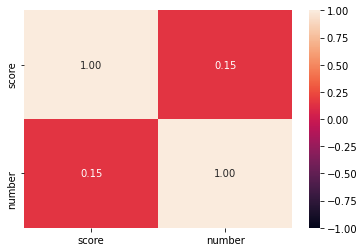

In [25]:
sb.heatmap(Directors_df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### However, there is a low correlation between number of movies directors direct and score of the moves



# Data Exploration of Writer
## Correlation between Writers and Scores

In [26]:
#filtering data from year 2010 to 2020
df_yearrange = df[df['year'].between(2010, 2020)]
print("Data type : ", type(df_yearrange))
print("Data dims : ", df_yearrange.shape)
df_yearrange.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1521, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,836836967.0,Warner Bros.,148.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,623933331.0,Paramount Pictures,124.0
5645,Shutter Island,R,Mystery,2010,"February 19, 2010 (United States)",8.2,1200000.0,Martin Scorsese,Laeta Kalogridis,Leonardo DiCaprio,United States,80000000.0,294805697.0,Paramount Pictures,138.0
5646,Scott Pilgrim vs. the World,PG-13,Action,2010,"August 13, 2010 (United States)",7.5,394000.0,Edgar Wright,Michael Bacall,Michael Cera,United States,60000000.0,48917974.0,Universal Pictures,112.0
5647,Grown Ups,PG-13,Comedy,2010,"June 25, 2010 (United States)",5.9,233000.0,Dennis Dugan,Adam Sandler,Adam Sandler,United States,80000000.0,271457301.0,Columbia Pictures,102.0


In [27]:
#create a joint dataframe by concatenating the two variables
score = pd.DataFrame(df_yearrange['score']) 
writer = pd.DataFrame(df_yearrange['writer'])
Writers_df = pd.concat([score,writer],axis=1).reindex(writer.index)
Writers_df

,score,writer
5643,8.8,Christopher Nolan
5644,7.0,Justin Theroux
5645,8.2,Laeta Kalogridis
5646,7.5,Michael Bacall
5647,5.9,Adam Sandler
...,...,...
7648,6.6,Peter Craig
7649,6.5,Pat Casey
7650,5.6,Stephen Gaghan
7651,6.8,Michael Green


In [28]:
#combining score, writer and number of movies
Writers_df['number'] = Writers_df.groupby(['writer'])['writer'].transform('count')
Writers_df

,score,writer,number
5643,8.8,Christopher Nolan,3
5644,7.0,Justin Theroux,3
5645,8.2,Laeta Kalogridis,2
5646,7.5,Michael Bacall,3
5647,5.9,Adam Sandler,2
...,...,...,...
7648,6.6,Peter Craig,4
7649,6.5,Pat Casey,1
7650,5.6,Stephen Gaghan,1
7651,6.8,Michael Green,2


In [29]:
#sorting number of movies
Writers_df.sort_values(by='number', ascending=False)

,score,writer,number
6592,7.0,Steven Knight,7
6322,7.1,Steven Knight,7
6990,6.6,Woody Allen,7
6611,6.5,Woody Allen,7
6296,6.4,Christopher Markus,7
...,...,...,...
6073,5.5,David Caspe,1
6778,6.2,Max Joseph,1
6780,6.7,Paul Weitz,1
6782,5.3,Angelina Jolie,1


In [30]:
#new dataframe for writers who wrote 7 movies
seven = Writers_df[Writers_df['number'] == 7]
seven.head()

,score,writer,number
5727,6.3,Christopher Markus,7
5823,6.3,Woody Allen,7
5843,6.9,Christopher Markus,7
5849,7.7,Woody Allen,7
6296,6.4,Christopher Markus,7


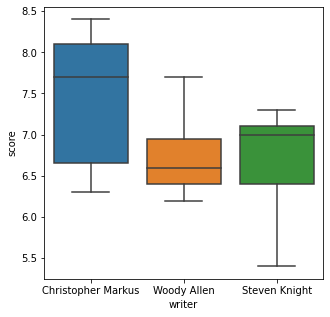

In [31]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'writer', y = 'score', data = seven)
plt.xticks(rotation=0);

In [32]:
#new dataframe for writers who wrote 6 movies
six = Writers_df[Writers_df['number'] == 6]
six.head()

,score,writer,number
5648,6.4,Sean Anders,6
5657,6.8,Leigh Whannell,6
5658,7.7,Dan Fogelman,6
5764,6.2,Allan Loeb,6
5852,6.4,Allan Loeb,6


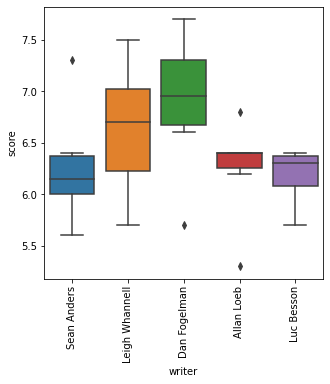

In [33]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'writer', y = 'score', data = six)
plt.xticks(rotation=90);

In [34]:
#new dataframe for writers who wrote 5 movies
five = Writers_df[Writers_df['number'] == 5]
five.head()

,score,writer,number
5668,7.6,Cinco Paul,5
5670,7.6,Joel Coen,5
5694,6.8,Mark Bomback,5
5848,7.3,Chris Morgan,5
5863,7.2,Jonathan Aibel,5


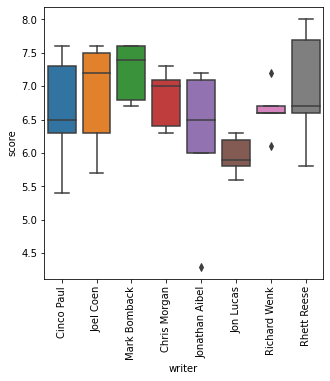

In [35]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'writer', y = 'score', data = five)
plt.xticks(rotation=90);

In [36]:
#new dataframe for writers who wrote 4 movies
four = Writers_df[Writers_df['number'] == 4]
four.head()

,score,writer,number
5651,7.5,Peter Craig,4
5655,6.6,Brian Helgeland,4
5661,4.0,M. Night Shyamalan,4
5667,6.4,Linda Woolverton,4
5685,8.2,John Lasseter,4


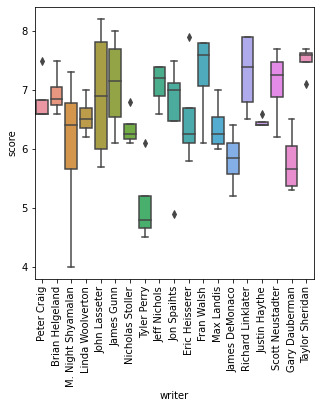

In [37]:
#boxplot to find the 50th percentile 
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'writer', y = 'score', data = four)
plt.xticks(rotation=90);

In [38]:
#grouping writers by the number of movies
NumWriter_byMovies = [seven, six, five, four]
result_Writers = pd.concat(NumWriter_byMovies)

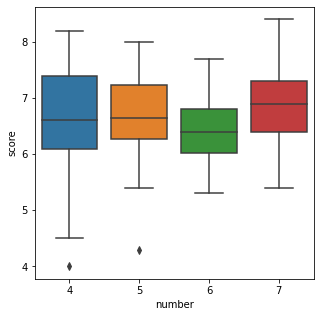

In [39]:
#boxplot to find the general score against number of movies writers wrote
f = plt.figure(figsize=(5, 5))
sb.boxplot(x = 'number', y = 'score', data = result_Writers)
plt.xticks(rotation=0);

### Finding: Generally writers with more movies do better

In [40]:
#new dataframe for mean score of 7 movies
seven["mean7"] = seven["score"].mean()
seven.head()

<ipython-input-40-e529ca84b4b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven["mean7"] = seven["score"].mean()


,score,writer,number,mean7
5727,6.3,Christopher Markus,7,6.942857
5823,6.3,Woody Allen,7,6.942857
5843,6.9,Christopher Markus,7,6.942857
5849,7.7,Woody Allen,7,6.942857
6296,6.4,Christopher Markus,7,6.942857


In [41]:
#new dataframe for mean score of 6 movies
six["mean6"] = six["score"].mean()
six.head()

<ipython-input-41-45c5410ed4d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six["mean6"] = six["score"].mean()


,score,writer,number,mean6
5648,6.4,Sean Anders,6,6.443333
5657,6.8,Leigh Whannell,6,6.443333
5658,7.7,Dan Fogelman,6,6.443333
5764,6.2,Allan Loeb,6,6.443333
5852,6.4,Allan Loeb,6,6.443333


In [42]:
#new dataframe for mean score of 5 movies
five["mean5"] = five["score"].mean()
five.head()

<ipython-input-42-9ca2691bbffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five["mean5"] = five["score"].mean()


,score,writer,number,mean5
5668,7.6,Cinco Paul,5,6.6625
5670,7.6,Joel Coen,5,6.6625
5694,6.8,Mark Bomback,5,6.6625
5848,7.3,Chris Morgan,5,6.6625
5863,7.2,Jonathan Aibel,5,6.6625


In [43]:
#new dataframe for mean score of 4 movies
four["mean4"] = four["score"].mean()
four.head()

<ipython-input-43-f27bebc38d92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four["mean4"] = four["score"].mean()


,score,writer,number,mean4
5651,7.5,Peter Craig,4,6.611842
5655,6.6,Brian Helgeland,4,6.611842
5661,4.0,M. Night Shyamalan,4,6.611842
5667,6.4,Linda Woolverton,4,6.611842
5685,8.2,John Lasseter,4,6.611842


### Finding: The mean score for writers with more movies is higher

<AxesSubplot:>

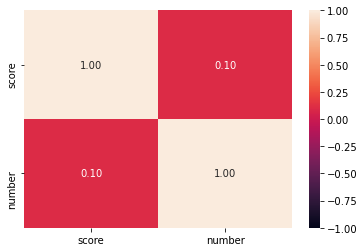

In [44]:
sb.heatmap(Writers_df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Finding: However, the correlation between number of movies written by writers and score of the movie is low. 

# Data Exploration of Numeric Variables
Now we will be looking at numeric variables to determine which variable will be the most suitable to be used in Machine Learning in predicting the success of a factor. 

## Correlation Matrix
Let's look at the correlation between the numerical variables

In [45]:
# extract numeric data variables
numberic_variables = pd.DataFrame(df_yearrange[["year","score","votes", "budget", "gross", "runtime"]])

             year     score     votes    budget     gross   runtime
year     1.000000  0.035656 -0.096751  0.057062  0.103528  0.110561
score    0.035656  1.000000  0.514574  0.126269  0.246104  0.421141
votes   -0.096751  0.514574  1.000000  0.509533  0.626707  0.435479
budget   0.057062  0.126269  0.509533  1.000000  0.779401  0.376260
gross    0.103528  0.246104  0.626707  0.779401  1.000000  0.324711
runtime  0.110561  0.421141  0.435479  0.376260  0.324711  1.000000


<AxesSubplot:>

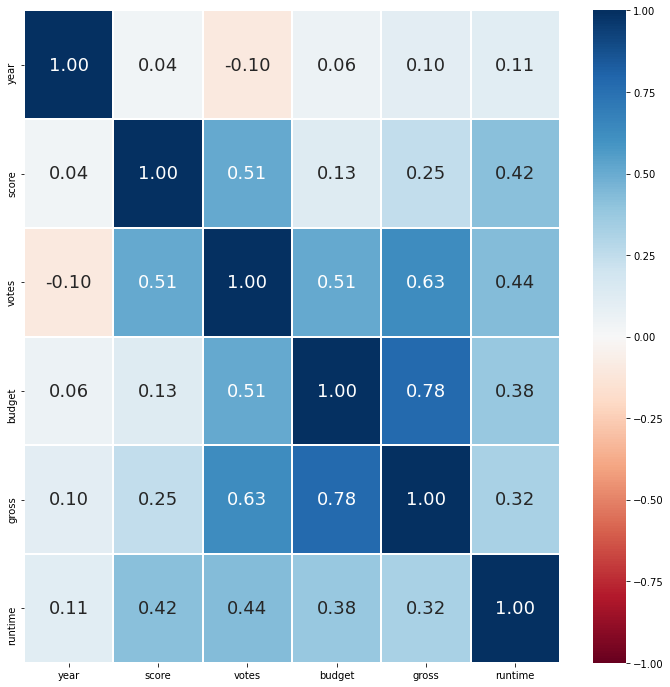

In [46]:
# Correlation Matrix
print(numberic_variables.corr())

# Correlation Heatmap of all numeric variables
f = plt.figure(figsize=(12, 12))
sb.heatmap(numberic_variables.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Looking at the heatmap, budget and gross has the higher correlation of 0.78 and the next highest correlation is between votes and gross of 0.63. Let's look at the correlation graph between the numerical variables

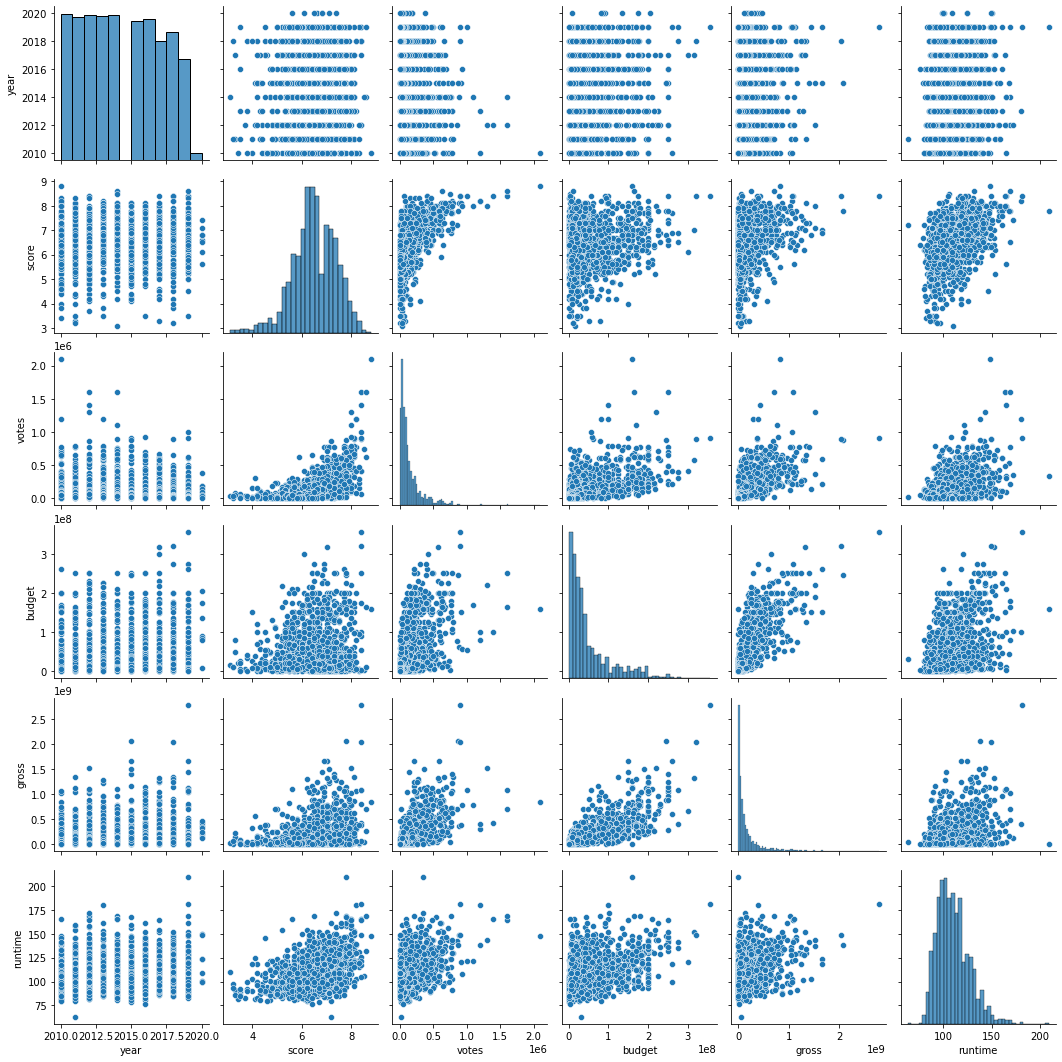

In [47]:
sb.pairplot(data = numberic_variables)

### Let's look at more closely at the linear regression between 
- gross revenue and budget
- gross revenue and votes
- gross revenue and score  

In [48]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

gross = pd.DataFrame(df_yearrange['gross'])
budget = pd.DataFrame(df_yearrange['budget'])
votes = pd.DataFrame(df_yearrange['votes'])
score = pd.DataFrame(df_yearrange['score'])

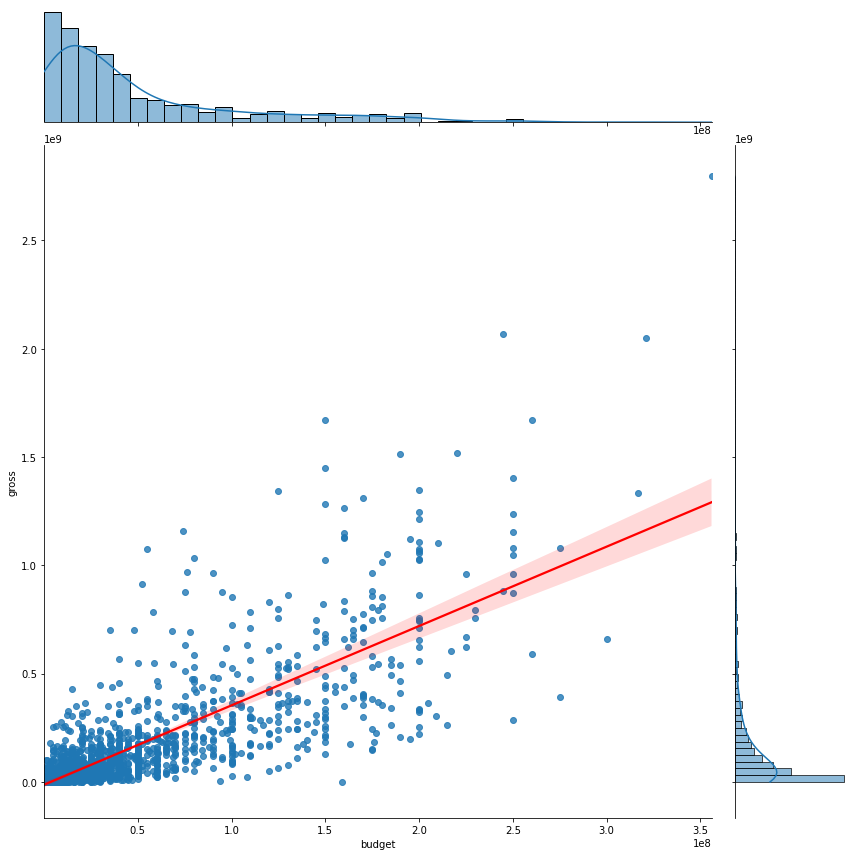

In [49]:
#regression plot between gross revenue and budget
sb.jointplot(data = df_yearrange, x = "budget", y = "gross", height = 12, kind = "reg", joint_kws={'line_kws':{'color':'red'}})

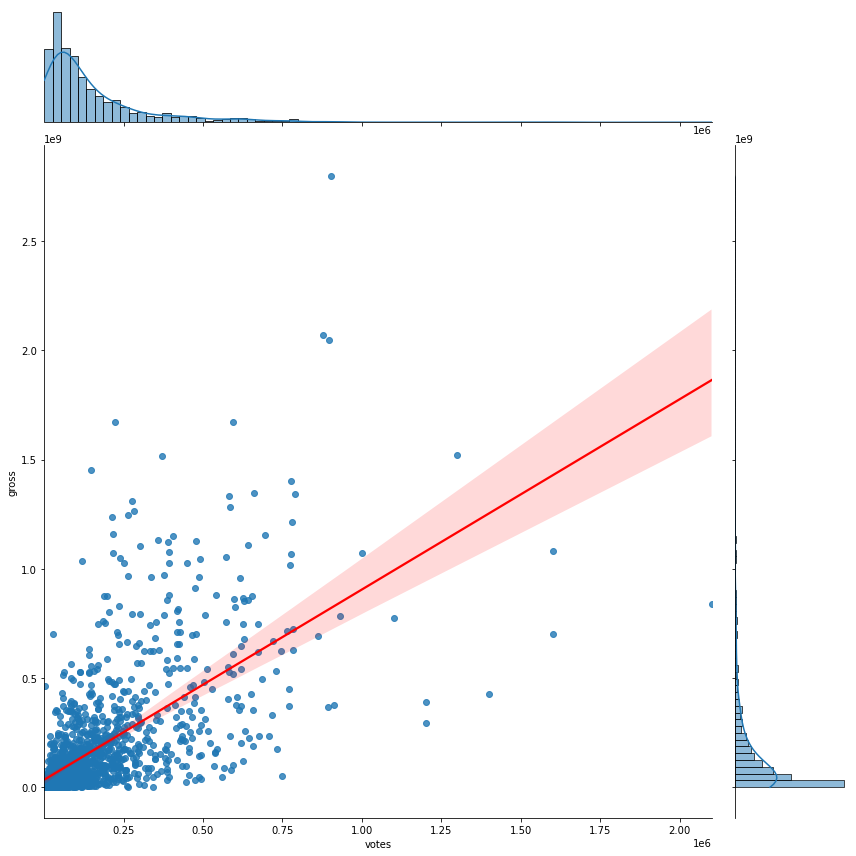

In [50]:
#regression plot between gross revenue and votes
sb.jointplot(data = df_yearrange, x = "votes", y = "gross", height = 12, kind = "reg", joint_kws={'line_kws':{'color':'red'}})

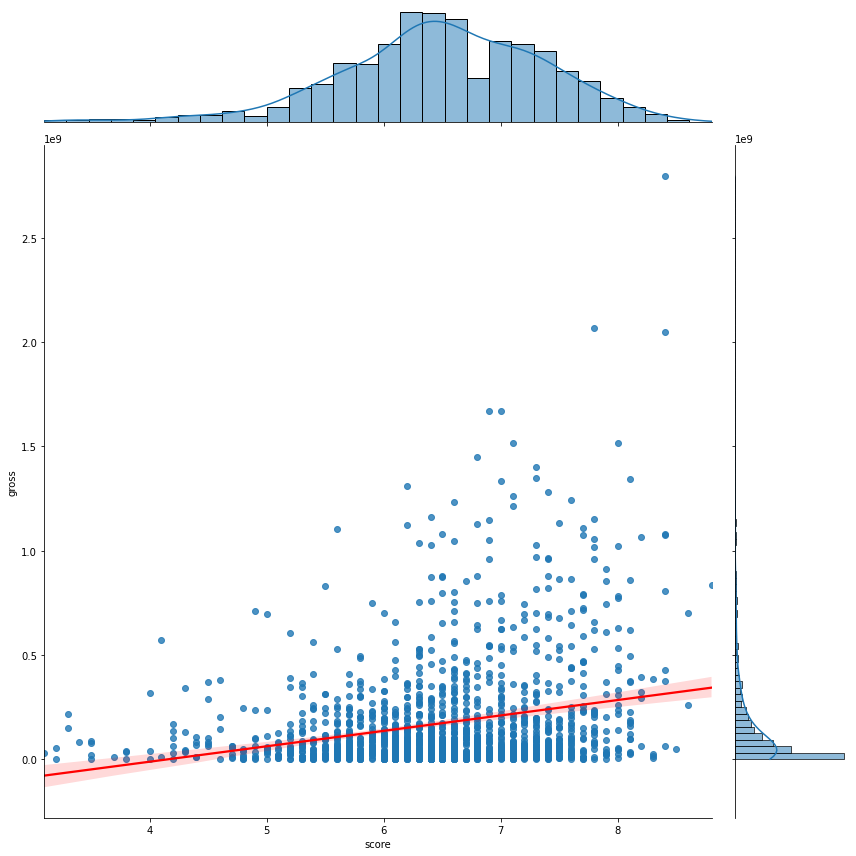

In [51]:
#regression plot between gross revenue and score
sb.jointplot(data = numberic_variables, x = "score", y = "gross", height = 12, kind = "reg", joint_kws={'line_kws':{'color':'red'}})

### Findings: From the graphs, both budget and votes have good correlation with gross revenue. 
We feel that if a movie has more budget, the director and crew is able to use more expensive equipment, CG effects, audio etc, which will make a movie more attractive. This increases the number of views and hence the gross revenue.

More popular movies have more people watching them, naturally resulting in more votes. The number of votes is an important variable because it shows the number of people who felt strongly about the movie enough to leave a vote. 

Another interesting note is that movie score has a relatively weak correlation with gross revenue. Considering that movie score is normally the average of all scores left by viewers, this is strange. Upon investigation, we realised that websites manipulates the votes according to their bias. For instance, IMDb, Rotten Tomatoes and Metacritic all have a bias towards men. This shows that a movie's success in terms of popularitiy does not depend on the score. 


## Let's look at the differences between the top 30 movies and the rest of the movies in the dataset to confirm our above findings.
The top 30 movies have the highest gross revenue.

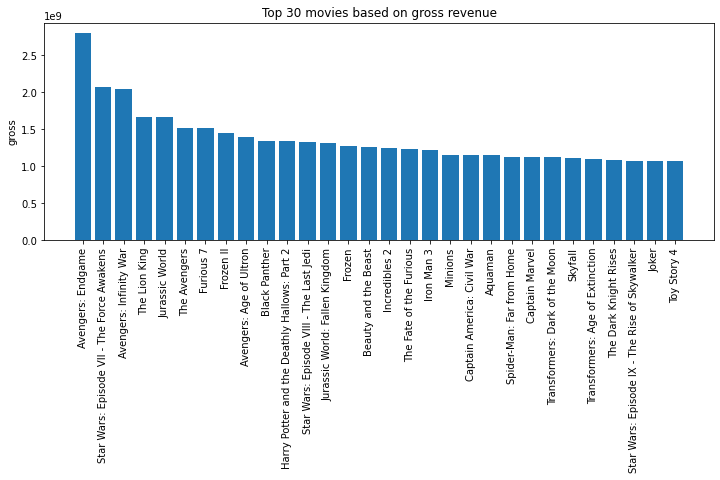

In [52]:
#arranging data frame based on gross revenue descending order
df_gross_descending=df_yearrange.sort_values(by='gross', ascending=False) 
# take the first 30 rows as our top 30 movies based on gross revenue
top30 = df_gross_descending.head(30)

# plot the bar graph
plt.figure(figsize = (12,4))
plt.bar(top30.name,top30.gross)
plt.xticks(rotation = 90)
plt.title("Top 30 movies based on gross revenue")
plt.ylabel("gross")
plt.show()

From this list of top 30 movies, we can tell that these are all movies people know of, such as Avengers, Frozen and Toy Story. 
Let's take a closer look at what these 30 movies have in common.

In [53]:
top30[["name","score","votes", "budget", "gross", "runtime"]]

,name,score,votes,budget,gross,runtime
7445,Avengers: Endgame,8.4,903000.0,356000000.0,2.797501e+09,181.0
6663,Star Wars: Episode VII - The Force Awakens,7.8,876000.0,245000000.0,2.069522e+09,138.0
7244,Avengers: Infinity War,8.4,897000.0,321000000.0,2.048360e+09,149.0
7480,The Lion King,6.9,222000.0,260000000.0,1.670728e+09,118.0
6653,Jurassic World,7.0,593000.0,150000000.0,1.670516e+09,124.0
6043,The Avengers,8.0,1300000.0,220000000.0,1.518816e+09,143.0
6646,Furious 7,7.1,370000.0,190000000.0,1.515341e+09,137.0
7494,Frozen II,6.8,148000.0,150000000.0,1.450027e+09,103.0
6644,Avengers: Age of Ultron,7.3,777000.0,250000000.0,1.402810e+09,141.0
7247,Black Panther,7.3,661000.0,200000000.0,1.347598e+09,134.0


From a glance, the top 30 movies generally have extremely high budget as well as the number of votes. The gross revenue and runtime is roughly around the same. As for the score, it varies from 5.6 to 8.4. 

Let's compare the top 30 movies with all the movies in the dataset.

In [54]:
all_movies_numerical_values = df_yearrange [["name","score","votes", "budget", "gross", "runtime"]]
print ("mean values of all movies in dataset")
all_movies_numerical_values.mean()

mean values of all movies in dataset


score      6.494280e+00
votes      1.586227e+05
budget     5.051979e+07
gross      1.723021e+08
runtime    1.101341e+02
dtype: float64

In [55]:
top30_numerical_values = top30[["name","score","votes", "budget", "gross", "runtime"]]
print ("mean values of top 30 movies")
top30_numerical_values.mean()

mean values of top 30 movies


score      7.266667e+00
votes      5.739000e+05
budget     2.034333e+08
gross      1.369446e+09
runtime    1.338333e+02
dtype: float64

## Findings: 
From the mean values above, the mean value for votes for the top 30 movies are a lot higher as compared to all movies. Additionally, the top 30 movies have higher mean budget than mean of all the movies. The mean score for the top 30 movies and the mean score of the rest of the movies are roughly the same. 

Hence, this confirms our findings that score and gross revenue do not have a strong relationship, and that gross revenue has a relatively strong relationship with the number of votes and budget. 
Therefore, score is not an appropriate parameter in deciding the success of a movie.

# Using Profits as parameter
We decided that Profit is a better parameter in deciding the success of a movie as we noticed that there were negative profits (loss) for several movies. If we were to using gross revenue to determine the success of a movie, it would be inaccurate due to the possibility of negative profits.

In [56]:
# Calculating the profits of each movie - Gross minus Budget
df_yearrange['profit'] = df_yearrange.apply(lambda x: x['gross'] - x['budget'], axis=1)
df_yearrange['profit'].head

<ipython-input-56-5cb26e718de2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearrange['profit'] = df_yearrange.apply(lambda x: x['gross'] - x['budget'], axis=1)


<bound method NDFrame.head of 5643    676836967.0
5644    423933331.0
5645    214805697.0
5646    -11082026.0
5647    191457301.0
           ...     
7648    336505244.0
7649    234715683.0
7650     70487753.0
7651    -23894503.0
7652    381421559.0
Name: profit, Length: 1521, dtype: float64>

In [57]:
df_yearrange

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,836836967.0,Warner Bros.,148.0,676836967.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,623933331.0,Paramount Pictures,124.0,423933331.0
5645,Shutter Island,R,Mystery,2010,"February 19, 2010 (United States)",8.2,1200000.0,Martin Scorsese,Laeta Kalogridis,Leonardo DiCaprio,United States,80000000.0,294805697.0,Paramount Pictures,138.0,214805697.0
5646,Scott Pilgrim vs. the World,PG-13,Action,2010,"August 13, 2010 (United States)",7.5,394000.0,Edgar Wright,Michael Bacall,Michael Cera,United States,60000000.0,48917974.0,Universal Pictures,112.0,-11082026.0
5647,Grown Ups,PG-13,Comedy,2010,"June 25, 2010 (United States)",5.9,233000.0,Dennis Dugan,Adam Sandler,Adam Sandler,United States,80000000.0,271457301.0,Columbia Pictures,102.0,191457301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,336505244.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,234715683.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,70487753.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,-23894503.0


             year     score     votes    budget     gross   runtime    profit
year     1.000000  0.035656 -0.096751  0.057062  0.103528  0.110561  0.108182
score    0.035656  1.000000  0.514574  0.126269  0.246104  0.421141  0.259530
votes   -0.096751  0.514574  1.000000  0.509533  0.626707  0.435479  0.613545
budget   0.057062  0.126269  0.509533  1.000000  0.779401  0.376260  0.670757
gross    0.103528  0.246104  0.626707  0.779401  1.000000  0.324711  0.987468
runtime  0.110561  0.421141  0.435479  0.376260  0.324711  1.000000  0.289614
profit   0.108182  0.259530  0.613545  0.670757  0.987468  0.289614  1.000000


<AxesSubplot:>

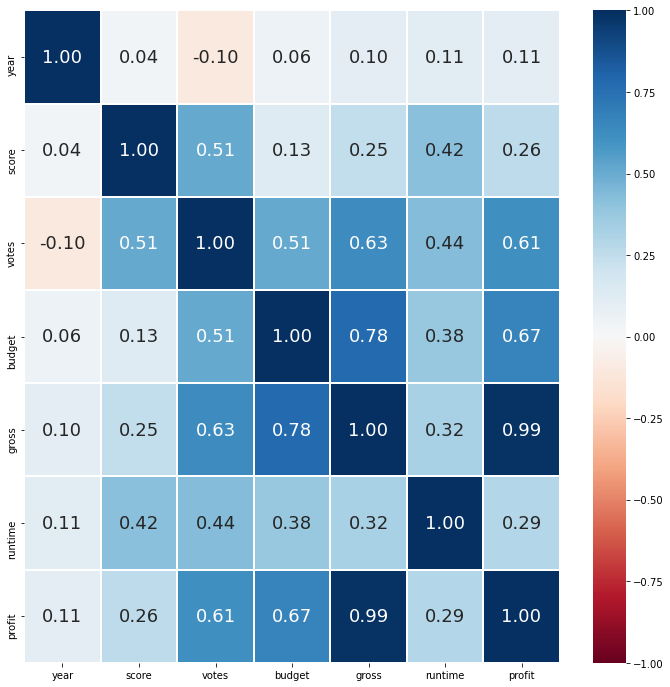

In [58]:
# Correlation Matrix
print(df_yearrange.corr())

# Correlation Heatmap of all numeric variables
f = plt.figure(figsize=(12, 12))
sb.heatmap(df_yearrange.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Findings : 
With the correlation matrix, we can identify that Gross, Budget and Votes have the highest correlation with profits. We chose to ignore Gross and Budget as Profit was derived from those two parameters and will obviously lead to a higher correlation. Thus, the team decided to choose Votes.

## Profit and Votes

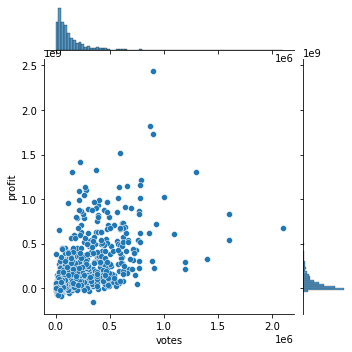

In [59]:
#jointplot of profit against votes
sb.jointplot(data = df_yearrange,x='votes', y= 'profit', height=5)

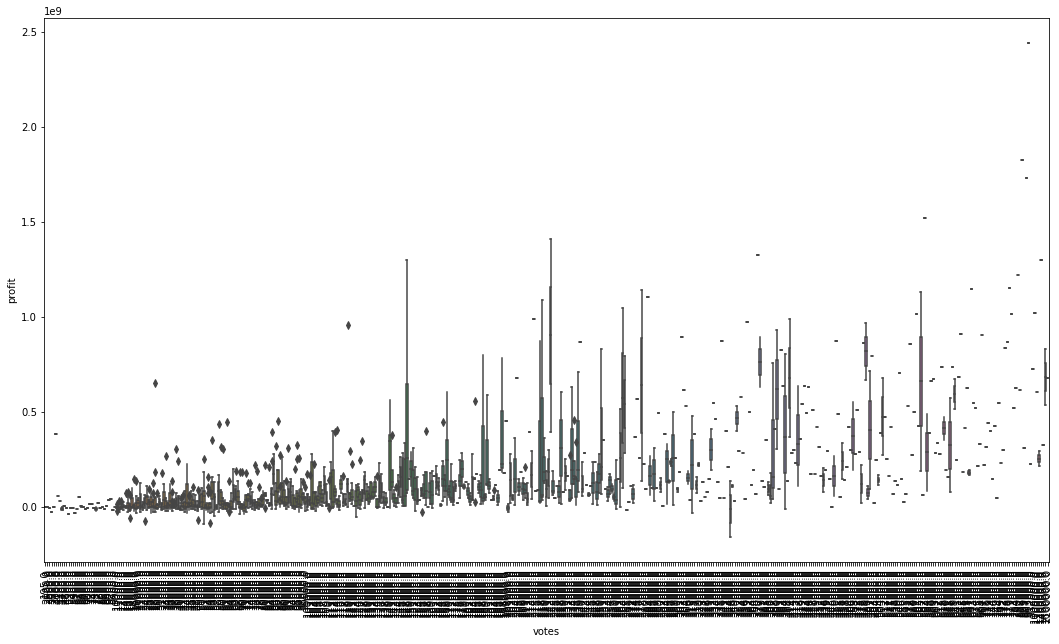

In [60]:
# Check the distribution of 'votes' across 'profit'.
f = plt.figure(figsize=(18, 10))
sb.boxplot(x = 'votes', y = 'profit', data = df_yearrange)
plt.xticks(rotation=90);

In [61]:
df2 = pd.DataFrame(df_yearrange)
selected_columns = df2[["votes","profit"]]
votesandprofit = selected_columns.copy()
print(votesandprofit)

          votes       profit
5643  2100000.0  676836967.0
5644   746000.0  423933331.0
5645  1200000.0  214805697.0
5646   394000.0  -11082026.0
5647   233000.0  191457301.0
...         ...          ...
7648   140000.0  336505244.0
7649   102000.0  234715683.0
7650    53000.0   70487753.0
7651    42000.0  -23894503.0
7652     3700.0  381421559.0

[1521 rows x 2 columns]


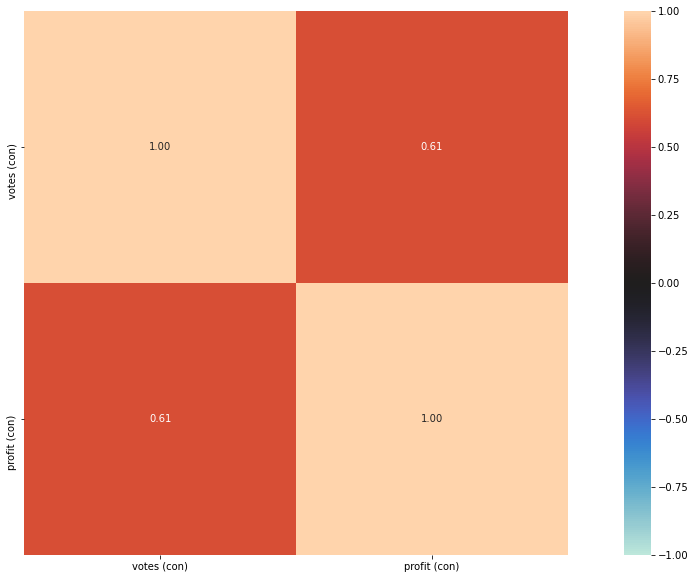

In [62]:
#Calculating and showing correlation between votes and profit using Heatmap
!pip install dython
from dython import nominal
nominal.associations(votesandprofit,figsize=(20,10),mark_columns=True);

## Findings: 
From the heat map above, it shows that Profit and Votes have a significantly strong relationship.

Therefore, we will be using votes to predict to predict the success of the movie.

# Predict Movies' sucess using votes

In [83]:
#Check the Correlation Coefficient to get a confirmation on the strong linear relationship we observe.
profit = pd.DataFrame(votesandprofit['profit'])
votes = pd.DataFrame(votesandprofit['votes'])
votesandprofit.profit.corr(votesandprofit.votes)

0.6135447106077198

In [288]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(votesandprofit['profit'])
X = pd.DataFrame(votesandprofit['votes'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 300)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1221, 1) (1221, 1)
Test Set  : (300, 1) (300, 1)


In [289]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

In [290]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [7383322.60549681]
Coefficients 	: a =  [[713.89996294]]


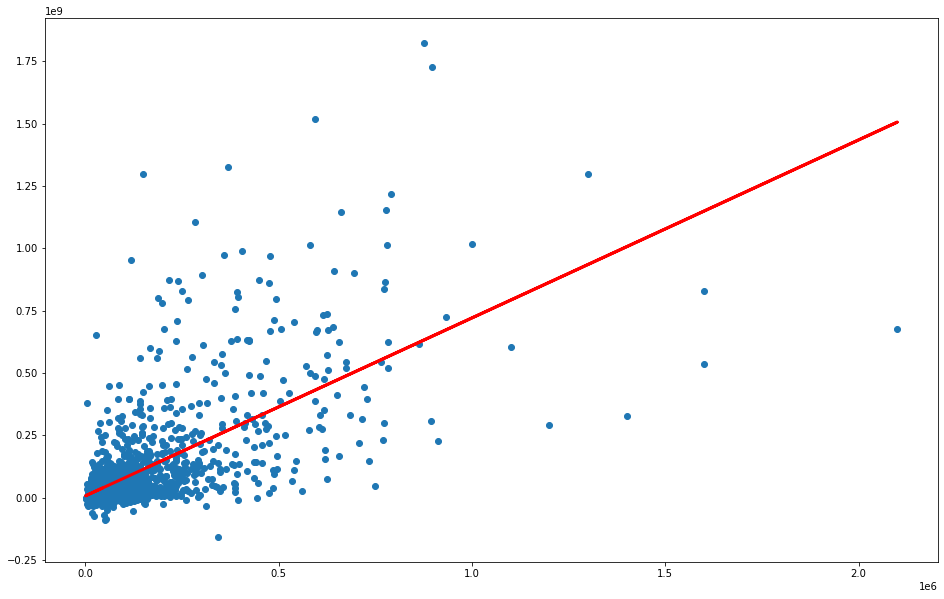

In [291]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

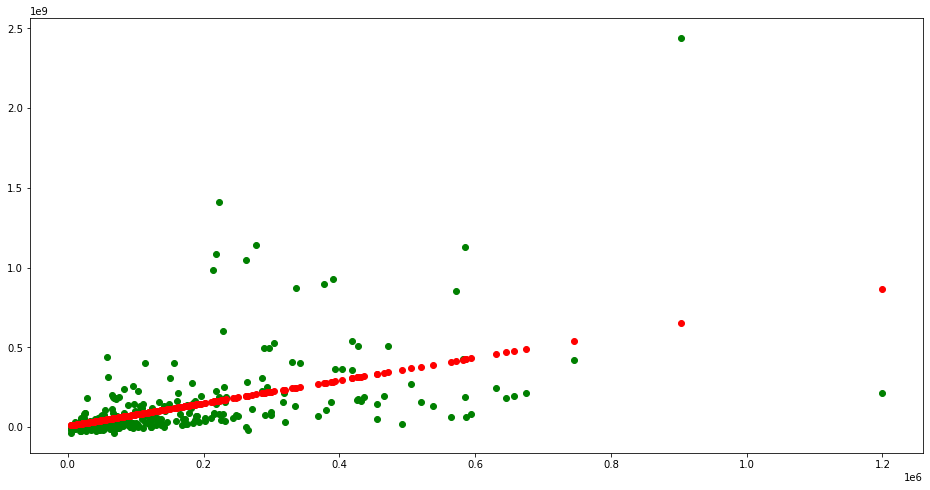

In [292]:
# Predict profit values corresponding to votes
score_test_pred = linreg.predict(X_test)

# Plot the profit
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, score_test_pred, color = "red")
plt.show()

In [293]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, y_test))

Explained Variance (R^2) on Train Set 	: 0.41264854381354277
Explained Variance (R^2) on Test Set 	: 0.26407828657671595


## Findings:
Using test size of 300, we found out that votes can fairly predict movies' success with a value of 0.42.